In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('../TensorFlow_FILES/DATA/cancer_classification.csv')


In [3]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [4]:
y=df['benign_0__mal_1'].values
X=df.drop('benign_0__mal_1',axis=1).values

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

SCALING DATA

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler=MinMaxScaler()

In [9]:
scaler.fit(X_train)


MinMaxScaler()

In [10]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

CREATIMNG THE MODEL

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation

In [12]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [13]:
early_stop=EarlyStopping(monitor='val_loss',verbose=1,mode='min',patience=25)

In [14]:
pwd

'f:\\PYTHONFORDATASCIENCE\\CLASSCODE\\25_deeplearning'

## Creating the Tensorboard Callback

TensorBoard is a visualization tool provided with TensorFlow.

This callback logs events for TensorBoard, including:
* Metrics summary plots
* Training graph visualization
* Activation histograms
* Sampled profiling

If you have installed TensorFlow with pip, you should be able
to launch TensorBoard from the command line:

```sh
tensorboard --logdir=path_to_your_logs
```

You can find more information about TensorBoard
[here](https://www.tensorflow.org/tensorboard/).

    Arguments:
        log_dir: the path of the directory where to save the log files to be
          parsed by TensorBoard.
        histogram_freq: frequency (in epochs) at which to compute activation and
          weight histograms for the layers of the model. If set to 0, histograms
          won't be computed. Validation data (or split) must be specified for
          histogram visualizations.
        write_graph: whether to visualize the graph in TensorBoard. The log file
          can become quite large when write_graph is set to True.
        write_images: whether to write model weights to visualize as image in
          TensorBoard.
        update_freq: `'batch'` or `'epoch'` or integer. When using `'batch'`,
          writes the losses and metrics to TensorBoard after each batch. The same
          applies for `'epoch'`. If using an integer, let's say `1000`, the
          callback will write the metrics and losses to TensorBoard every 1000
          samples. Note that writing too frequently to TensorBoard can slow down
          your training.
        profile_batch: Profile the batch to sample compute characteristics. By
          default, it will profile the second batch. Set profile_batch=0 to
          disable profiling. Must run in TensorFlow eager mode.
        embeddings_freq: frequency (in epochs) at which embedding layers will
          be visualized. If set to 0, embeddings won't be visualized.
       

In [15]:
from datetime import datetime

In [16]:
datetime.now().strftime("%Y--%m--%d--%H%M")

'2024--07--15--1645'

In [17]:

# WINDOWS: Use "logs\\fit"
# MACOS/LINUX: Use "logs\fit"

"""
log_directory = 'logs\\fit'
"""

# OPTIONAL: ADD A TIMESTAMP FOR UNIQUE FOLDER
# timestamp = datetime.now().strftime("%Y-%m-%d--%H%M")
# log_directory = log_directory + '\\' + timestamp

"""
board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)
"""

"\nboard = TensorBoard(log_dir=log_directory,histogram_freq=1,\n    write_graph=True,\n    write_images=True,\n    update_freq='epoch',\n    profile_batch=2,\n    embeddings_freq=1)\n"

In [18]:
log_directory = 'logs\\fit'
timestamp = datetime.now().strftime("%Y-%m-%d--%H%M")
log_directory = log_directory + '\\' + timestamp
#where we are going to save our log in training,[And by default, it should be logs fit.]

board=TensorBoard(log_dir=log_directory,histogram_freq=1,
write_graph=True,
write_images=True,
update_freq='epoch',
profile_batch=2,
embeddings_freq=1)

In [19]:
model=Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam')

TRAIN MODEL

In [20]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600,verbose=1,callbacks=[early_stop,board])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.7383 - val_loss: 0.6769
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6646 - val_loss: 0.6649
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6798 - val_loss: 0.6519
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6504 - val_loss: 0.6384
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6324 - val_loss: 0.6201
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6472 - val_loss: 0.6006
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6226 - val_loss: 0.5776
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5949 - val_loss: 0.5598
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.5768 - val_loss: 0.5362
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5601 - val_loss: 0.5030
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5574 - val_loss: 0.4766
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

RUNNING TENSORBOARD

## Running through the Command Line

**Watch video to see how to run Tensorboard through a command line call.**

Tensorboard will run locally in your browser at [http://localhost:6006/](http://localhost:6006/)


In [21]:
print(log_directory)

logs\fit\2024-07-15--1645


In [22]:
pwd

'f:\\PYTHONFORDATASCIENCE\\CLASSCODE\\25_deeplearning'

In [23]:
sampdf=pd.DataFrame(model.history.history)

<Axes: >

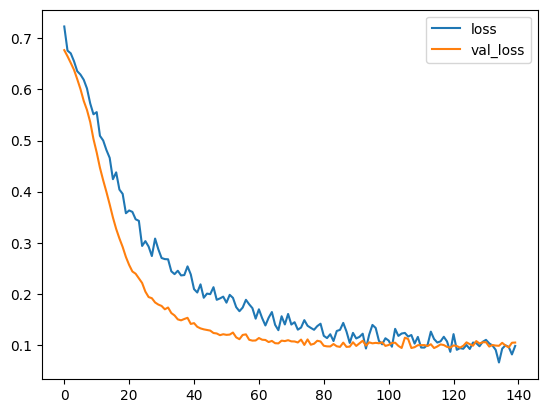

In [24]:
sampdf.plot()